# はじめに
このコンペは、**これから行われるバスケの試合の勝敗を予測するコンペ**です。

個人的にバスケの分析についてもっと知りたいと思い、自分の勉強も兼ねてチュートリアルを書くことにしました。バスケコンペだけでなく、他のいろいろなテーブルコンペに参加するときにも参考になりましたら幸いです。

# Part 1. コンペデータを見る
まずはコンペデータをざっと眺めてみます。詳しい内容や使い方はあとのパートで調べるので、ここではざっと眺めるだけにしておきます。

In [1]:
import os
import warnings
import pandas as pd

warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

for dirname, _, filenames in os.walk('/kaggle/input'):
    if dirname != "/kaggle/input/march-machine-learning-mania-2025":
        continue
    filenames = sorted(filenames)
    print("コンペデータのCSVの数は", len(filenames))
    cnt = 0
    for filename in filenames:
        cnt += 1
        print("*" * 50)
        try:
            df = pd.read_csv(os.path.join(dirname, filename))
        except:
            df = pd.read_csv(os.path.join(dirname, filename), encoding='cp1252')
        print(f"No.{cnt}", filename, df.shape)
        display(df.head(3))

コンペデータのCSVの数は 36
**************************************************
No.1 Cities.csv (502, 3)


,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY


**************************************************
No.2 Conferences.csv (51, 2)


,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference


**************************************************
No.3 MConferenceTourneyGames.csv (6491, 5)


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194


**************************************************
No.4 MGameCities.csv (85534, 6)


,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080


**************************************************
No.5 MMasseyOrdinals.csv (5489117, 5)


,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12


**************************************************
No.6 MNCAATourneyCompactResults.csv (2518, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0


**************************************************
No.7 MNCAATourneyDetailedResults.csv (1382, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18


**************************************************
No.8 MNCAATourneySeedRoundSlots.csv (776, 5)


,Seed,GameRound,GameSlot,EarlyDayNum,LateDayNum
0,W01,1,R1W1,136,137
1,W01,2,R2W1,138,139
2,W01,3,R3W1,143,144


**************************************************
No.9 MNCAATourneySeeds.csv (2558, 3)


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228


**************************************************
No.10 MNCAATourneySlots.csv (2519, 4)


,Season,Slot,StrongSeed,WeakSeed
0,1985,R1W1,W01,W16
1,1985,R1W2,W02,W15
2,1985,R1W3,W03,W14


**************************************************
No.11 MRegularSeasonCompactResults.csv (191796, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0


**************************************************
No.12 MRegularSeasonDetailedResults.csv (117748, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23


**************************************************
No.13 MSeasons.csv (41, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West


**************************************************
No.14 MSecondaryTourneyCompactResults.csv (1809, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,1985,136,1151,67,1155,65,H,0,NIT
1,1985,136,1153,77,1245,61,H,0,NIT
2,1985,136,1201,79,1365,76,H,0,NIT


**************************************************
No.15 MSecondaryTourneyTeams.csv (1836, 3)


,Season,SecondaryTourney,TeamID
0,1985,NIT,1108
1,1985,NIT,1133
2,1985,NIT,1139


**************************************************
No.16 MTeamCoaches.csv (13533, 5)


,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson


**************************************************
No.17 MTeamConferences.csv (13388, 3)


,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec


**************************************************
No.18 MTeamSpellings.csv (1177, 2)


,TeamNameSpelling,TeamID
0,a&m-corpus chris,1394
1,a&m-corpus christi,1394
2,abilene chr,1101


**************************************************
No.19 MTeams.csv (380, 4)


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025


**************************************************
No.20 SampleSubmissionStage1.csv (507108, 2)


,ID,Pred
0,2021_1101_1102,0.5
1,2021_1101_1103,0.5
2,2021_1101_1104,0.5


**************************************************
No.21 SampleSubmissionStage2.csv (131407, 2)


,ID,Pred
0,2025_1101_1102,0.5
1,2025_1101_1103,0.5
2,2025_1101_1104,0.5


**************************************************
No.22 SeedBenchmarkStage1.csv (507108, 2)


,ID,Pred
0,2021_1101_1102,0.50
1,2021_1101_1103,0.50
2,2021_1101_1104,0.14


**************************************************
No.23 WConferenceTourneyGames.csv (6113, 5)


,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2002,a_sun,129,3194,3144
1,2002,a_sun,129,3209,3407
2,2002,a_sun,129,3273,3125


**************************************************
No.24 WGameCities.csv (82329, 6)


,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,11,3103,3237,Regular,4002
1,2010,11,3104,3399,Regular,4085
2,2010,11,3110,3224,Regular,4363


**************************************************
No.25 WNCAATourneyCompactResults.csv (1650, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0


**************************************************
No.26 WNCAATourneyDetailedResults.csv (894, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,138,3124,69,3201,55,N,0,28,57,1,5,12,19,13,24,22,12,6,2,12,21,61,10,34,3,5,17,19,12,18,4,1,18
1,2010,138,3173,67,3395,66,N,0,23,59,9,26,12,19,13,34,13,16,3,10,14,22,73,8,27,14,15,18,26,8,8,8,6,22
2,2010,138,3181,72,3214,37,H,0,26,57,4,13,16,22,13,34,15,11,10,7,11,15,56,4,15,3,8,10,21,4,16,6,4,20


**************************************************
No.27 WNCAATourneySeeds.csv (1676, 3)


,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112


**************************************************
No.28 WNCAATourneySlots.csv (1713, 4)


,Season,Slot,StrongSeed,WeakSeed
0,1998,R1W1,W01,W16
1,1998,R1W2,W02,W15
2,1998,R1W3,W03,W14


**************************************************
No.29 WRegularSeasonCompactResults.csv (135948, 8)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0


**************************************************
No.30 WRegularSeasonDetailedResults.csv (80626, 34)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,5,9,12,19,10,26,14,18,7,0,15,20,54,3,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,5,12,16,28,16,31,15,20,5,2,25,25,63,4,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,6,15,7,12,14,23,18,13,6,2,17,19,58,2,14,19,23,17,23,8,15,6,0,15


**************************************************
No.31 WSeasons.csv (28, 6)


,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1998,10/27/1997,East,Midwest,Mideast,West
1,1999,10/26/1998,East,Mideast,Midwest,West
2,2000,11/01/1999,East,Midwest,Mideast,West


**************************************************
No.32 WSecondaryTourneyCompactResults.csv (828, 9)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SecondaryTourney
0,2013,135,3120,80,3412,57,H,0,WNIT
1,2013,135,3140,69,3226,54,H,0,WNIT
2,2013,135,3158,72,3297,70,A,0,WBI


**************************************************
No.33 WSecondaryTourneyTeams.csv (824, 3)


,Season,SecondaryTourney,TeamID
0,2013,WBI,3125
1,2013,WBI,3158
2,2013,WBI,3178


**************************************************
No.34 WTeamConferences.csv (9490, 3)


,Season,TeamID,ConfAbbrev
0,1998,3102,wac
1,1998,3103,mac
2,1998,3104,sec


**************************************************
No.35 WTeamSpellings.csv (1170, 2)


,TeamNameSpelling,TeamID
0,a&m-corpus chris,3394
1,a&m-corpus christi,3394
2,abilene chr,3101


**************************************************
No.36 WTeams.csv (378, 2)


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron


結構ありますね。ファイル名が"M"から始まるものが男子のデータ、"W"から始まるものが女子のデータのようです。どのCSVをどう使えばよいかは、あとのパートで調べることにします。

続いて、コンペに必要なドメイン知識を押さえましょう。

# Part 2. ドメイン知識を知る
March Maniaはアメリカで毎年行われる大学バスケットボールの大会です。ドメイン知識があると解法が分かりやすくなるので、ざっと紹介します。

## カンファレンス
地域リーグのようなもの。原則1つのチームが所属するカンファレンスは1つだけ。カンファレンスごとのチーム数は8や16、18など様々。

## レギュラーシーズン
同一カンファレンス内で対戦が組まれる「カンファレンス戦」と、そうでない「非カンファレンス戦」の2つに分かれる。
1. **非カンファレンス戦**  
   シーズンの最初（11月〜12月）に行われる。
   
2. **カンファレンス戦**  
   シーズン後半（1月〜3月初旬）に行われる。ホーム＆アウェイ形式が基本。**カンファレンス戦の成績が、カンファレンストーナメントのシード順に影響する。**

## トーナメント
主にカンファレンストーナメント、NCAAトーナメント、セカンダリートーナメントの3種類がある。
1. **カンファレンストーナメント**  
   カンファレンス（地域リーグ）ごとに開催されるトーナメント。３月上旬に行われる。**優勝チームは自動的にNCAAトーナメントに出場できる。**

2. **★重要★ NCAAトーナメント**  
   通称「**March Madness**」。**このコンペで予測するのは、このNCAAトーナメントの勝敗。**
   
   March Madnessには**男女それぞれ68チームずつが出場し、負けたら即敗退**。トーナメントは大きく4つの地域（East、West、South、Midwest）に分かれており、各地域からファイナル4（準決勝）進出チームが決まる。
   
   March Madnessへの出場枠は次の2種類で決まる。
   1. **オートマチック・ビッド（自動出場枠）**  
      カンファレンストーナメントの優勝チーム（31チーム）
      
   2. **アットラージ・ビッド（選考出場枠）**  
      レギュラーシーズンの結果から、選考委員会が決定する37チーム

   March Madnessの最初の4試合を特に**First Four**と呼ぶ。これは、全68チーム中最もシードの低い8チームが4試合を戦い、勝ち上がった4チームが正式に64チームによる本トーナメントに進出するというもの。
  
4. **セカンダリートーナメント**  
   March Madnessに出場できなかったチームのための大会。「NIT」、「CBI」、「The Basketball Classsic」などの大会がある。出場チーム数は大会によって様々。

**コンペデータはコンペ締め切り日まで随時更新されます。**（レギュラーシーズンもカンファレンストーナメントもコンペ期間中に終了するため。）

# Part 3. March Mania 2023の1位解法を読む
March Mania 2025のコンペ内容は、**March Mania 2023とかなり似ています**。2025のコンペデータは、2023と比べてテーブル数がいくつか増えています（どのテーブルかはあとのパートで見ることにします）。他のテーブルについては同じ構造です。評価指標も同じです。したがって、March Mania 2023の1位解法を読めば大筋が掴めるはずです。
- リファレンス：[March Mania 2023 1位解法のノートブック](https://www.kaggle.com/code/rustyb/paris-madness-2023)

では読んでみましょう。

## コンペデータの読み込み
たくさんあったコンペデータのうち、どのCSVを使っているかに注目します。

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from scipy.interpolate import UnivariateSpline
import statsmodels.api as sm
import matplotlib.pyplot as plt

DATA_PATH = '/kaggle/input/march-machine-learning-mania-2023/'

# 使うCSVは6つ。
# マーチマッドネスの試合結果。これは過去のデータしかないはず
tourney_results = pd.concat([
    pd.read_csv(DATA_PATH + "MNCAATourneyDetailedResults.csv"),
    pd.read_csv(DATA_PATH + "WNCAATourneyDetailedResults.csv"),
], ignore_index=True)

# マーチマッドネスのシード情報。これはコンペ期間中にその年の情報が手に入っていたはず
seeds = pd.concat([
    pd.read_csv(DATA_PATH + "MNCAATourneySeeds.csv"),
    pd.read_csv(DATA_PATH + "WNCAATourneySeeds.csv"),
], ignore_index=True)

# シーズンの試合結果。これもコンペ期間中にその年の情報が手に入っていたはず
regular_results = pd.concat([
    pd.read_csv(DATA_PATH + "MRegularSeasonDetailedResults.csv"),
    pd.read_csv(DATA_PATH + "WRegularSeasonDetailedResults.csv"),
], ignore_index=True)

使っているCSVは6つでした。コンペデータを全部使わなくても戦えるようです。

## 特徴量の作成
続いて、どのような特徴量が作られていたかや、特徴量の数はどれくらいだったかなどを見てみましょう。

In [3]:
def prepare_data(df):
    # 勝者と敗者をスワップしたものを用意。
    # 内容は同じでもデータ量は2倍に
    dfswap = df[['Season', 'DayNum', 'LTeamID', 'LScore', 'WTeamID', 'WScore', 'WLoc', 'NumOT', 
    'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 
    'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]

    dfswap.loc[df['WLoc'] == 'H', 'WLoc'] = 'A'
    dfswap.loc[df['WLoc'] == 'A', 'WLoc'] = 'H'
    df.columns.values[6] = 'location'
    dfswap.columns.values[6] = 'location'    
      
    df.columns = [x.replace('W','T1_').replace('L','T2_') for x in list(df.columns)]
    dfswap.columns = [x.replace('L','T1_').replace('W','T2_') for x in list(dfswap.columns)]

    # 元データとスワップしたものを結合
    output = pd.concat([df, dfswap]).reset_index(drop=True)
    output.loc[output.location=='N','location'] = '0'
    output.loc[output.location=='H','location'] = '1'
    output.loc[output.location=='A','location'] = '-1'
    output.location = output.location.astype(int)
    
    output['PointDiff'] = output['T1_Score'] - output['T2_Score']
    
    return output

regular_data = prepare_data(regular_results)
tourney_data = prepare_data(tourney_results)

# 特徴量作成を開始。
# まずはシーズンのゲームスタッツ系の特徴量
boxscore_cols = [
        'T1_FGM', 'T1_FGA', 'T1_FGM3', 'T1_FGA3', 'T1_OR', 'T1_Ast', 'T1_TO', 'T1_Stl', 'T1_PF', 
        'T2_FGM', 'T2_FGA', 'T2_FGM3', 'T2_FGA3', 'T2_OR', 'T2_Ast', 'T2_TO', 'T2_Stl', 'T2_Blk',  
        'PointDiff']

funcs = [np.mean]

season_statistics = regular_data.groupby(["Season", 'T1_TeamID'])[boxscore_cols].agg(funcs).reset_index()

season_statistics.columns = [''.join(col).strip() for col in season_statistics.columns.values]

season_statistics_T1 = season_statistics.copy()
season_statistics_T2 = season_statistics.copy()

season_statistics_T1.columns = ["T1_" + x.replace("T1_","").replace("T2_","opponent_") for x in list(season_statistics_T1.columns)]
season_statistics_T2.columns = ["T2_" + x.replace("T1_","").replace("T2_","opponent_") for x in list(season_statistics_T2.columns)]
season_statistics_T1.columns.values[0] = "Season"
season_statistics_T2.columns.values[0] = "Season"

# マーチマッドネスデータの右に、作った特徴量をくっつける。
# マーチマッドネスのスタッツ情報は残念ながら削除。その年の情報を得ることができないため、使い道がない
tourney_data = tourney_data[['Season', 'DayNum', 'T1_TeamID', 'T1_Score', 'T2_TeamID' ,'T2_Score']]

tourney_data = pd.merge(tourney_data, season_statistics_T1, on = ['Season', 'T1_TeamID'], how = 'left')
tourney_data = pd.merge(tourney_data, season_statistics_T2, on = ['Season', 'T2_TeamID'], how = 'left')

# 直近14日間の勝率
last14days_stats_T1 = regular_data.loc[regular_data.DayNum>118].reset_index(drop=True)
last14days_stats_T1['win'] = np.where(last14days_stats_T1['PointDiff']>0,1,0)
last14days_stats_T1 = last14days_stats_T1.groupby(['Season','T1_TeamID'])['win'].mean().reset_index(name='T1_win_ratio_14d')

last14days_stats_T2 = regular_data.loc[regular_data.DayNum>118].reset_index(drop=True)
last14days_stats_T2['win'] = np.where(last14days_stats_T2['PointDiff']<0,1,0)
last14days_stats_T2 = last14days_stats_T2.groupby(['Season','T2_TeamID'])['win'].mean().reset_index(name='T2_win_ratio_14d')

# これもマーチマッドネスデータの右にくっつける
tourney_data = pd.merge(tourney_data, last14days_stats_T1, on = ['Season', 'T1_TeamID'], how = 'left')
tourney_data = pd.merge(tourney_data, last14days_stats_T2, on = ['Season', 'T2_TeamID'], how = 'left')

# チームクオリティという特徴量を作る
regular_season_effects = regular_data[['Season','T1_TeamID','T2_TeamID','PointDiff']].copy()
regular_season_effects['T1_TeamID'] = regular_season_effects['T1_TeamID'].astype(str)
regular_season_effects['T2_TeamID'] = regular_season_effects['T2_TeamID'].astype(str)
regular_season_effects['win'] = np.where(regular_season_effects['PointDiff']>0,1,0)
march_madness = pd.merge(seeds[['Season','TeamID']],seeds[['Season','TeamID']],on='Season')
march_madness.columns = ['Season', 'T1_TeamID', 'T2_TeamID']
march_madness.T1_TeamID = march_madness.T1_TeamID.astype(str)
march_madness.T2_TeamID = march_madness.T2_TeamID.astype(str)
regular_season_effects = pd.merge(regular_season_effects, march_madness, on = ['Season','T1_TeamID','T2_TeamID'])

def team_quality(season):
    formula = 'win~-1+T1_TeamID+T2_TeamID'
    glm = sm.GLM.from_formula(formula=formula, 
                              data=regular_season_effects.loc[regular_season_effects.Season==season,:], 
                              family=sm.families.Binomial()).fit()
    
    quality = pd.DataFrame(glm.params).reset_index()
    quality.columns = ['TeamID','quality']
    quality['Season'] = season
    #quality['quality'] = np.exp(quality['quality'])
    quality = quality.loc[quality.TeamID.str.contains('T1_')].reset_index(drop=True)
    quality['TeamID'] = quality['TeamID'].apply(lambda x: x[10:14]).astype(int)
    return quality

formula = 'win~-1+T1_TeamID+T2_TeamID'
glm = sm.GLM.from_formula(formula=formula, 
                          data=regular_season_effects.loc[regular_season_effects.Season==2010,:], 
                          family=sm.families.Binomial()).fit()

quality = pd.DataFrame(glm.params).reset_index()

glm_quality = pd.concat([team_quality(2010),
                         team_quality(2011),
                         team_quality(2012),
                         team_quality(2013),
                         team_quality(2014),
                         team_quality(2015),
                         team_quality(2016),
                         team_quality(2017),
                         team_quality(2018),
                         team_quality(2019),
                         ##team_quality(2020),
                         team_quality(2021),
                         team_quality(2022),
                         team_quality(2023)
                         ]).reset_index(drop=True)

# マーチマッドネスの右に
glm_quality_T1 = glm_quality.copy()
glm_quality_T2 = glm_quality.copy()
glm_quality_T1.columns = ['T1_TeamID','T1_quality','Season']
glm_quality_T2.columns = ['T2_TeamID','T2_quality','Season']

tourney_data = pd.merge(tourney_data, glm_quality_T1, on = ['Season', 'T1_TeamID'], how = 'left')
tourney_data = pd.merge(tourney_data, glm_quality_T2, on = ['Season', 'T2_TeamID'], how = 'left')

# シードナンバーも特徴量
seeds['seed'] = seeds['Seed'].apply(lambda x: int(x[1:3]))

# マーチマッドネスの右に
seeds_T1 = seeds[['Season','TeamID','seed']].copy()
seeds_T2 = seeds[['Season','TeamID','seed']].copy()
seeds_T1.columns = ['Season','T1_TeamID','T1_seed']
seeds_T2.columns = ['Season','T2_TeamID','T2_seed']

tourney_data = pd.merge(tourney_data, seeds_T1, on = ['Season', 'T1_TeamID'], how = 'left')
tourney_data = pd.merge(tourney_data, seeds_T2, on = ['Season', 'T2_TeamID'], how = 'left')

tourney_data["Seed_diff"] = tourney_data["T1_seed"] - tourney_data["T2_seed"]

# できあがった特徴量の数をチェック
features = list(season_statistics_T1.columns[2:999]) + \
    list(season_statistics_T2.columns[2:999]) + \
    list(seeds_T1.columns[2:999]) + \
    list(seeds_T2.columns[2:999]) + \
    list(last14days_stats_T1.columns[2:999]) + \
    list(last14days_stats_T2.columns[2:999]) + \
    ["Seed_diff"] + ["T1_quality","T2_quality"]

print("特徴量の数は", len(features))

# できあがった特徴量はこんな感じ
display(tourney_data[features].head(3))
print("\nfeatures shape:", tourney_data[features].shape)

特徴量の数は 45


,T1_FGMmean,T1_FGAmean,T1_FGM3mean,T1_FGA3mean,T1_ORmean,T1_Astmean,T1_TOmean,T1_Stlmean,T1_PFmean,T1_opponent_FGMmean,T1_opponent_FGAmean,T1_opponent_FGM3mean,T1_opponent_FGA3mean,T1_opponent_ORmean,T1_opponent_Astmean,T1_opponent_TOmean,T1_opponent_Stlmean,T1_opponent_Blkmean,T1_PointDiffmean,T2_FGMmean,T2_FGAmean,T2_FGM3mean,T2_FGA3mean,T2_ORmean,T2_Astmean,T2_TOmean,T2_Stlmean,T2_PFmean,T2_opponent_FGMmean,T2_opponent_FGAmean,T2_opponent_FGM3mean,T2_opponent_FGA3mean,T2_opponent_ORmean,T2_opponent_Astmean,T2_opponent_TOmean,T2_opponent_Stlmean,T2_opponent_Blkmean,T2_PointDiffmean,T1_seed,T2_seed,T1_win_ratio_14d,T2_win_ratio_14d,Seed_diff,T1_quality,T2_quality
0,24.379310,56.793103,6.482759,18.000000,12.275862,13.034483,16.206897,7.068966,19.103448,27.793103,60.965517,7.620690,20.758621,13.724138,15.862069,12.827586,8.827586,4.241379,-7.241379,24.733333,55.266667,5.933333,18.500000,13.166667,14.200000,15.233333,6.433333,18.300000,25.666667,60.400000,7.533333,23.166667,11.933333,13.766667,14.333333,8.000000,2.600000,1.966667,16,16,1.000000,0.833333,0,NaN,NaN
1,30.321429,65.714286,7.035714,20.071429,15.178571,17.642857,14.785714,8.464286,17.750000,26.357143,64.678571,6.321429,19.964286,13.107143,15.464286,16.857143,5.964286,2.392857,14.964286,24.827586,55.862069,5.275862,15.482759,12.965517,14.206897,14.068966,6.862069,15.896552,22.758621,55.068966,7.068966,21.448276,9.586207,13.275862,13.000000,7.103448,3.655172,4.655172,1,16,0.666667,1.000000,-15,NaN,NaN
2,27.206897,56.896552,4.000000,12.586207,13.689655,15.551724,14.000000,5.206897,19.413793,24.793103,55.655172,5.448276,15.896552,11.000000,14.068966,15.517241,6.000000,3.931034,6.793103,26.275862,60.000000,7.000000,20.068966,14.068966,16.620690,13.793103,7.379310,18.758621,23.275862,57.862069,5.896552,18.310345,12.344828,13.310345,15.068966,7.275862,3.172414,8.689655,10,7,0.666667,0.750000,3,NaN,NaN



features shape: (4016, 45)


1位解法では45個の特徴量を作っていたようです。案外少ない気もしますが、厳選された特徴量と考えることもできます。次はモデルのトレーニングです。

## XGBoost Modelのトレーニング
予測モデルの構築をします。1位解法では、**得点差を予測するXGBoost Model**と、**得点差を勝つ確率に変換するSpline Model**の2つに分けていたみたいです。まずXGBoost Modelから見ていきます。

In [4]:
# 勝敗を直接予測するのでなく、得点差を予測しにいくようだ。
# つまり、得点差を勝敗に変換するためのモデルもあとで作ることになる
y = tourney_data['T1_Score'] - tourney_data['T2_Score']

X = tourney_data[features].values
dtrain = xgb.DMatrix(X, label = y)

# なにこれ？
def cauchyobj(preds, dtrain):
    labels = dtrain.get_label()
    c = 5000 
    x =  preds-labels    
    grad = x / (x**2/c**2+1)
    hess = -c**2*(x**2-c**2)/(x**2+c**2)**2
    return grad, hess

param = {} 
#param['objective'] = 'reg:linear'
param['eval_metric'] =  'mae'
param['booster'] = 'gbtree'
param['eta'] = 0.05 #change to ~0.02 for final run
param['subsample'] = 0.35
param['colsample_bytree'] = 0.7
param['num_parallel_tree'] = 3 #recommend 10
param['min_child_weight'] = 40
param['gamma'] = 10
param['max_depth'] =  3
param['silent'] = 1

# repeat_cvは推論に使うモデルの数。
# 各モデルで適正なイテレーション数を調べることをしているみたい
xgb_cv = []
repeat_cv = 3 # recommend 10

for i in range(repeat_cv): 
    print(f"Fold repeater {i}")
    xgb_cv.append(
        xgb.cv(
          params = param,
          dtrain = dtrain,
          obj = cauchyobj,
          num_boost_round = 3000,
          folds = KFold(n_splits = 5, shuffle = True, random_state = i),
          early_stopping_rounds = 25,
          verbose_eval = 50
        )
    )

iteration_counts = [np.argmin(x['test-mae-mean'].values) for x in xgb_cv]

# バリデーションデータの予測値は取っておく。
# 後続の変換モデルを構築する際に使います
oof_preds = []
for i in range(repeat_cv):
    preds = y.copy()
    kfold = KFold(n_splits = 5, shuffle = True, random_state = i)    
    for train_index, val_index in kfold.split(X,y):
        dtrain_i = xgb.DMatrix(X[train_index], label = y[train_index])
        dval_i = xgb.DMatrix(X[val_index], label = y[val_index])  
        model = xgb.train(
              params = param,
              dtrain = dtrain_i,
              num_boost_round = iteration_counts[i],
              verbose_eval = 50
        )
        preds[val_index] = model.predict(dval_i)
    oof_preds.append(np.clip(preds,-30,30))

Fold repeater 0
[0]	train-mae:13.32333+0.06504	test-mae:13.32617+0.26567
[50]	train-mae:9.44384+0.05038	test-mae:9.72923+0.20282
[100]	train-mae:9.03705+0.05021	test-mae:9.56698+0.21230
[150]	train-mae:8.77745+0.05420	test-mae:9.54055+0.20124
[200]	train-mae:8.56659+0.04754	test-mae:9.53375+0.18638
[215]	train-mae:8.50743+0.04760	test-mae:9.53763+0.17820
Fold repeater 1
[0]	train-mae:13.32369+0.01893	test-mae:13.33265+0.07484
[50]	train-mae:9.45638+0.05127	test-mae:9.72943+0.17935
[100]	train-mae:9.05732+0.04193	test-mae:9.55465+0.16871
[150]	train-mae:8.80326+0.03922	test-mae:9.52663+0.14827
[170]	train-mae:8.70956+0.03671	test-mae:9.52440+0.14507
Fold repeater 2
[0]	train-mae:13.32690+0.08802	test-mae:13.33280+0.36095
[50]	train-mae:9.44934+0.04454	test-mae:9.72728+0.19432
[100]	train-mae:9.04699+0.03929	test-mae:9.55542+0.15716
[150]	train-mae:8.79637+0.03711	test-mae:9.53407+0.14934
[200]	train-mae:8.57662+0.03566	test-mae:9.51853+0.15747
[208]	train-mae:8.54642+0.03491	test-mae:9.

これでXGBoost Modelが3つ完成。

## Spline Modelの構築
スプラインは、得点差（予測値）を横軸、勝つ確率（グランドトゥルース）を縦軸に取って近似曲線を引くようなイメージ。

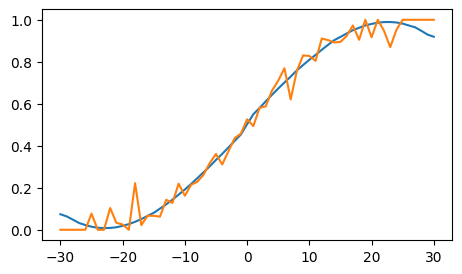

In [5]:
# UnivariateSplineでモデル化。
# XGBoost Modelsの数と同じだけ作っている
spline_model = []

for i in range(repeat_cv):
    dat = list(zip(oof_preds[i],np.where(y>0,1,0)))
    dat = sorted(dat, key = lambda x: x[0])
    datdict = {}
    for k in range(len(dat)):
        datdict[dat[k][0]]= dat[k][1]
    spline_model.append(UnivariateSpline(list(datdict.keys()), list(datdict.values())))

# スプラインを可視化するとこんな感じ
plot_df = pd.DataFrame({"pred":oof_preds[0], "label":np.where(y>0,1,0), "spline":spline_model[0](oof_preds[0])})
plot_df["pred_int"] = (plot_df["pred"]).astype(int)
plot_df = plot_df.groupby('pred_int').mean().reset_index()

plt.figure(figsize=[5.3,3.0])
plt.plot(plot_df.pred_int,plot_df.spline)
plt.plot(plot_df.pred_int,plot_df.label)

スプライン曲線の両端が少し反転してしまっているのがちょっと気になりますね。モデルが全て用意できたので、最後に推論です。

## 推論
テストデータに対しても同様に特徴量を作り、モデルにインプットするという流れになります。

In [6]:
# テストデータの準備。
# トレーニングデータは〜2022、テストデータは2023のものです
sub = pd.read_csv(DATA_PATH + "SampleSubmission2023.csv")
sub['Season'] = sub['ID'].apply(lambda x: int(x.split('_')[0]))
sub["T1_TeamID"] = sub['ID'].apply(lambda x: int(x.split('_')[1]))
sub["T2_TeamID"] = sub['ID'].apply(lambda x: int(x.split('_')[2]))

# 特徴量を結合。
# 2023の特徴量も作成済みなので、右にくっつければOK
sub = pd.merge(sub, season_statistics_T1, on = ['Season', 'T1_TeamID'], how = 'left')
sub = pd.merge(sub, season_statistics_T2, on = ['Season', 'T2_TeamID'], how = 'left')

sub = pd.merge(sub, glm_quality_T1, on = ['Season', 'T1_TeamID'], how = 'left')
sub = pd.merge(sub, glm_quality_T2, on = ['Season', 'T2_TeamID'], how = 'left')

sub = pd.merge(sub, seeds_T1, on = ['Season', 'T1_TeamID'], how = 'left')
sub = pd.merge(sub, seeds_T2, on = ['Season', 'T2_TeamID'], how = 'left')

sub = pd.merge(sub, last14days_stats_T1, on = ['Season', 'T1_TeamID'], how = 'left')
sub = pd.merge(sub, last14days_stats_T2, on = ['Season', 'T2_TeamID'], how = 'left')

sub["Seed_diff"] = sub["T1_seed"] - sub["T2_seed"]

# データセットの形にする
Xsub = sub[features].values
dtest = xgb.DMatrix(Xsub)

# バリデーションなしの全トレーニングデータでトレーニングした方がより精度が出るはずなので、再度トレーニングし直している
sub_models = []
for i in range(repeat_cv):
    sub_models.append(
        xgb.train(
          params = param,
          dtrain = dtrain,
          num_boost_round = int(iteration_counts[i] * 1.05),
          verbose_eval = 50
        )
    )

# テストデータで推論。
# XGBoostで得点差を予測し、Splineで勝つ確率に変換
sub_preds = []
for i in range(repeat_cv):
    sub_preds.append(np.clip(spline_model[i](np.clip(sub_models[i].predict(dtest),-30,30)),0.025,0.975))
    
sub["Pred"] = pd.DataFrame(sub_preds).mean(axis=0)
sub[['ID','Pred']].to_csv("submission.csv", index = None)

display(sub[['ID','Pred']].head(3))

,ID,Pred
0,2023_1101_1102,0.196774
1,2023_1101_1103,0.185123
2,2023_1101_1104,0.039747


以上で提出ファイル完成です。どうやら最後に出てきたPredの値が[March Mania 2023 1位解法のノートブック](https://www.kaggle.com/code/rustyb/paris-madness-2023)と違うのですが、これはxgboostのバージョン差異によるものと思われます（xgboost==0.81 -> 2.0.3）。同様に**提出後のスコアも変わるので注意が必要です**。ライブラリのバージョンは、ノートブックのedit画面右側のタブの**ENVIRONMENT**の設定によって変わります。

また、1位解法だけでなく他の上位解法についてもDiscussionなどに公開されているので参考にするとよいでしょう。

# Part 4. テーブルの意味を知る
March Mania 2025では、March Mania 2023にはなかった新しいテーブルが追加されています。ただ、March Mania 2025でこれらのテーブルが活かせるかどうかは今のところちょっとよく分かりません。（SeedBenchmarkStage2.csvについて情報が欲しいところです。）
- SeedBenchmarkStage1.csv
- WConferenceTourneyGames.csv
- WSecondaryTourneyCompactResults.csv
- WSecondaryTourneyTeams.csv

以下、コンペデータの中から知っておくとよさそうな内容をピックアップしてみます。

## M/WSeasons.csv
- DayZero列: 各年度の基準日。いくつかのテーブルに出てくるDayNum列は、このDayZeroを0としての日数。
- RegionW/X/Y/Z列: ファイナル4（準決勝）での対戦を決めるためのもの。つまりファイナル4ではRegionW vs RegionX、RegionY vs RegionZ、という対戦が組まれる。

## ****Slots.csv
- Slot列: トーナメント上の各対戦に**スロット**というのが割り当てられている。例えば「R1W1」というスロットは、「1回戦 West regionの第1シード」と読む。また「X16」のような3桁のスロットは、NCAAトーナメントの一番最初に行われるFirst Four用のスロット。

## ****CompactResults.csv
- W: 勝ちチーム
- L: 負けチーム
- Loc: 試合会場のホーム/アウェイ/中立
- NumOT: 延長戦のピリオド数

## ****DetailedResults.csv
- FGM: Field-Goal-Made
- FGA: Field-Goal-Attempt
- （数が多いので中略）
- PF: Penalty-Foul

## M/WMasseyOrdinals.csv
- Massey Ordinals: 数十種類のランキングシステムを統合した総合ランキング。NCAA選考委員会がチームの実力を判断する際の参考指標の一つとされている。アットラージ・ビッドの選考やシード順位決定の際に考慮される可能性がある。

チュートリアルはこれでおしまいです。楽しみましょう！